# AS.030.421 HW 6
## Sam Dawley
## Due: 10/13/2021

$\quad$ The Einstein and Debye models for the heat capacity as a function of temperature, $C_e(T)$ and $C_d(T)$, respectively, are given below:

\begin{gather*}
C_e(T) = 3R\bigg(\frac{T_e}{T}\bigg)^2\bigg(\frac{e^{-T_e/T}}{(1-e^{-T_e/T})^2}\bigg) \\
C_d(T) = 9R\bigg(\frac{T}{T_d}\bigg)^3\int_0^{T_d/T}\frac{x^4e^{-x}}{(1-e^{-x})^2}dx
\end{gather*}

Implemented below are functions which compute the heat capacity at a particular temperature for either model, accounting for the number of atoms per formula unit of the substance.

In [47]:
import numpy as np
from scipy.integrate import quad

def Einstein(T, T_e, atoms):
    '''
    This is a function which implements the Einstein model for heat capacity.
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_e (float) = characterstic energy expressed as temperature. 
    T_e = w_e/k_B where k_B is the Boltzmann constant
    atoms (float) = atoms per formula unit
    
    Returns
    -------
    (float) The heat capacity at the temperature T with units joule per kelvin (J/K)
    '''
    R = 8.3144 # This is the ideal gas constant
    
    # The left-most term in the product for C_e above
    A = 3*R*(T_e/T)**2 
    
    # The right-most term in the product for C_e above
    B = (np.exp(-T_e/T))/(1-np.exp(-T_e/T))**2 
    
    return atoms*A*B

def Einstein_graphing(T, T_e, atoms):
    '''
    This is a function which grpahs the Einstein model for heat capacity.
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_e (float) = characterstic energy expressed as temperature. 
    T_e = w_e/k_B where k_B is the Boltzmann constant
    atoms (float) = atoms per formula unit
    
    Returns
    -------
    An array of heat capacities over the interval of temperatures provided at the characteristic temp T_e
    '''
    return [Einstein(x, T_e, atoms) for x in T]

def Debye(T, T_d, atoms):
    '''
    This is a function which implements the Debye model for heat capacity.
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_d (float) = characterstic energy expressed as temperature. 
    T_d = w_d/k_B where k_B is the Boltzmann constant
    atoms (float) = atoms per formula unit
    
    Returns
    -------
    (float) The heat capacity at the temperature T with units joule per kelvin (J/K)
    '''
    R = 8.3144 # This is the ideal gas constant
    
    # Everything that doesn't involve an integral in C_d above
    A = 9*R*(T/T_d)**3 
    
    # Everything that does involve an integral in C_d above. 
    # Note that quad returns a tuple: (est. value of integral, upper bound on the error)
    integral = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d/T)[0]
    
    return atoms*A*integral

def Debye_graphing(T, T_d, atoms):
    '''
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_d (float) = characterstic energy expressed as temperature. 
    T_d = w_d/k_B where k_B is the Boltzmann constant
    atoms (float) = atoms per formula unit
    
    Returns
    -------
    An array of heat capacities over the interval of temperatures provided at the characteristic temp T_d
    '''
    return [Debye(x, T_d, atoms) for x in T]

### 1. 
$\quad$ Here are both models for the heat capacity plotted as functions of temperature. They are very similar in shape and limit to the same values at $T=0$ K and as $T\to\infty$.

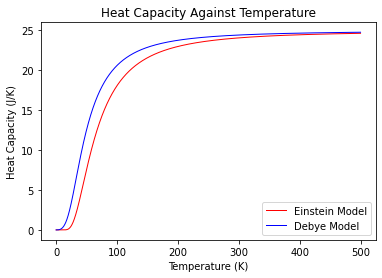

In [48]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure()

# Let's create C vs. T plots for both of these functions.
# First, here's the x axis
T_axis = np.linspace(0.01, 500, 10000)

# Here are arrays for each model at a characteristic temperature of 200 K
Einstein_y = Einstein_graphing(T_axis, 200, 1)
Debye_y = Debye_graphing(T_axis, 200, 1)

# Plotting and making things look semi-nice
plt.plot(T_axis, Einstein_y, c='r', lw=1, label='Einstein Model')
plt.plot(T_axis, Debye_y, c='b', lw=1, label='Debye Model')

plt.title('Heat Capacity Against Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/K)')
plt.legend()

$\quad$ In the limit as $T\to\infty$ we see that both of these models approach an asymptote near 25 J/K. This is known as the *Dulong-Petit law* which says that the heat capacity of a solid element is about $3R$ where $R$ is the ideal gas constant. This result holds for most elements aside from very light substances which are bound very strongly together, such as diamond.

### 2.

$\quad$ The Einstein and Debye models for the heat capacity as a function of temperature which we'll use to exacerbate the differences in the models are given below:

\begin{gather*}
C_e'(T) = \frac{C_e(T)}{T^3} = 3R\bigg(\frac{T_e^2}{T^5}\bigg)\bigg(\frac{e^{-T_e/T}}{(1-e^{-T_e/T})^2}\bigg) \\
C_d'(T) = \frac{C_d(T)}{T^3} = 9R\bigg(\frac{1}{T_d}\bigg)^3\int_0^{T_d/T}\frac{x^4e^{-x}}{(1-e^{-x})^2}dx
\end{gather*}

In [49]:
def Einstein_alt(T, T_e, atoms):
    '''
    This is a function which implements the Einstein model for heat capacity.
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_e (float) = characterstic energy expressed as temperature. 
    T_e = w_e/k_B where k_B is the Boltzmann constant
    atoms (float) = atoms per formula unit
    
    Returns
    -------
    (float) The heat capacity at the temperature T with units joule per kelvin (J/K)
    '''
    R = 8.3144 # This is the ideal gas constant
    
    # The left-most term in the product for C_e above
    A = 3*R*T_e**2/(T**5) 
    
    # The right-most term in the product for C_e above
    B = (np.exp(-T_e/T))/(1-np.exp(-T_e/T))**2 
    
    return atoms*A*B

def Einstein_alt_graphing(T, T_e, atoms):
    '''
    This is a function which graphs the Einstein model for heat capacity.
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_e (float) = characterstic energy expressed as temperature. 
    T_e = w_e/k_B where k_B is the Boltzmann constant
    atoms (float) = atoms per formula unit
    
    Returns
    -------
    (array) The heat capacities at the range of temperatures T with units joule per kelvin (J/K)
    '''
    return [Einstein_alt(x, T_e, atoms) for x in T]

def Debye_alt(T, T_d, atoms):
    '''
    This is a function which implements the Debye model for heat capacity.
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_d (float) = characterstic energy expressed as temperature. 
    T_d = w_d/k_B where k_B is the Boltzmann constant
    atoms (float) = atoms per formula unit
    
    Returns
    -------
    (float) The heat capacity at the temperature T with units joule per kelvin (J/K)
    '''
    R = 8.3144 # This is the ideal gas constant
    
    # Everything that doesn't involve an integral in C_d above
    A = 9*R*(1/T_d)**3 
    
    # Everything that does involve an integral in C_d above. 
    # Note that quad returns a tuple: (est. value of integral, upper bound on the error)
    integral = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d/T)[0]
    
    return atoms*A*integral

def Debye_graphing_alt(T, T_d, atoms):
    '''
    This is a function which graphs the Debye model for heat capacity.
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_d (float) = characterstic energy expressed as temperature. 
    T_d = w_d/k_B where k_B is the Boltzmann constant
    atoms (float) = atoms per formula unit
    
    Returns
    -------
    (array) The heat capacities at the range of temperature T with units joule per kelvin (J/K)
    '''
    return [Debye_alt(x, T_d, atoms) for x in T]

$\quad$ Here we'll plot the data to determine how they are different. Unsurprisingly their shapes change when we divide each model by temperature cubed. Possibly less unsurprisingly, however, is that at lower temperatures the Einsten model estimates the heat capacity to be smaller than does the Debye model. Whether this is an underestimate or an overestimate depends on the substance in question.  

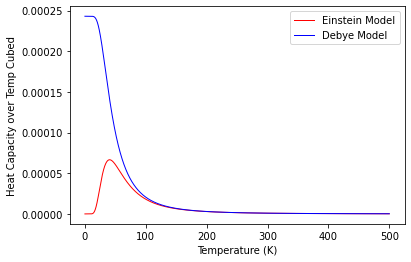

In [50]:
%matplotlib inline

plt.figure()

# Let's create C/T^3 vs. T plots for both of these functions.
# First, here's the x axis
T_axis = np.linspace(0.01, 500, 10000)

# Now here are arrays for each model at a characteristic temperature of 200 K
Einstein_y = Einstein_alt_graphing(T_axis, 200, 1)
Debye_y = Debye_graphing_alt(T_axis, 200, 1)

# Plotting and making things look semi-nice
plt.plot(T_axis, Einstein_y, c='r', lw=1, label='Einstein Model')
plt.plot(T_axis, Debye_y, c='b', lw=1, label='Debye Model')

plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity over Temp Cubed')
plt.legend()

### 3.
$\quad$ We'll start by importing the mystery data.

In [51]:
import csv
import os

cwd = os.getcwd()
with open(cwd + '/MysteryCpData.csv', 'r', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter = ',', quotechar = '|') 
    temperatures = []; heat_capacities = []
    for row in reader:
        x = float(row[0]); y = float(row[1])
        temperatures.append(x); heat_capacities.append(y)

$\quad$ Now we can fit with the Debye model using `scipy.optimize.curve_fit`. It doesn't do a great job, as is clear from the plot below. Also, the square root of the sum of the residuals squared is computed and printed. It's not super important but I'll use it later when comparing curve fits.

In [52]:
def LSRL(observed, fitted):
    '''
    Parameters
    ----------
    observed (array) = list of observed data points
    fitted (array) = list of data points extrapolated from best fit curve
    
    Returns
    -------
    square root of sum of residuals squared
    '''
    total = 0
    for i in range(len(observed)):
        residual = observed[i] - fitted[i]
        total += residual**2
    #print('Sqrt of Sum of Squared Residuals : {:0.3f}'.format(np.sqrt(total)))
    
    return np.sqrt(total)

Sqrt of Sum of Squared Residuals : 55.007


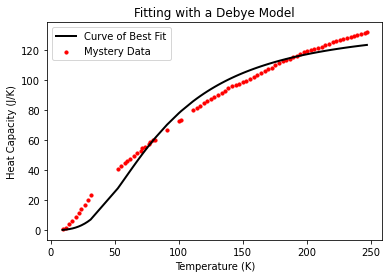

In [53]:
%matplotlib inline
from scipy.optimize import curve_fit

plt.figure()

parsD, covD = curve_fit(Debye_graphing, temperatures, heat_capacities)
        
plt.scatter(temperatures, heat_capacities, s=10, c='r', label='Mystery Data')
plt.plot(temperatures, Debye_graphing(temperatures, 
                                      parsD[0], parsD[1]), 
         c='k', lw=2, label='Curve of Best Fit')

plt.title('Fitting with a Debye Model')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/K)')
plt.legend()   

# Computing square root of sum of squared residuals and printing result
D1_res = LSRL(heat_capacities, Debye_graphing(temperatures, parsD[0], parsD[1]))
print('Sqrt of Sum of Squared Residuals : {:0.3f}'.format(D1_res))


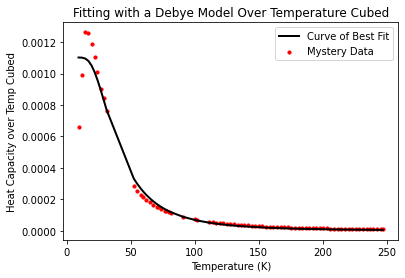

In [54]:
%matplotlib inline
from scipy.optimize import curve_fit

plt.figure()

# Here we create a list of heat capacity over temp^3 from the mystery data
mod_heat_capacities = [heat_capacities[i]/(temperatures[i]**3) for i in range(len(temperatures))]

# Fitting the alternative Debye function to the modified heat capacities
parsDA, covDA = curve_fit(Debye_graphing_alt, temperatures, mod_heat_capacities)
        
# Plotting the data
plt.scatter(temperatures, mod_heat_capacities, s=10, c='r', label='Mystery Data')
plt.plot(temperatures, Debye_graphing_alt(
    temperatures, parsDA[0], parsDA[1]), c='k', lw=2, label='Curve of Best Fit')

plt.title('Fitting with a Debye Model Over Temperature Cubed')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity over Temp Cubed')
plt.legend()   

### 4. 
$\quad$ At this point we'll find a curve of best fit for the heat capacity data using a sum of two Debye models. This was done using a new helper function, nearly identical to the original function defined above aside from the fact that we have two more parameters we need to fit.

In [55]:
def Debye_2(T, T_d, T_d2, atoms, a1, a2):
    '''
    This is a function which implements the Debye model for heat capacity using a linear combinations of two curves.
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_d (float) = characterstic energy expressed as temperature. 
    T_d = w_d/k_B where k_B is the Boltzmann constant
    T_d2 (float) = character characterstic energy expressed as temperature for the second curve
    atoms (float) = atoms per formula unit
    a1 (float) = coefficient of the first term in the sum
    a2 (float) = coefficient of the second term in the sum
    
    Returns
    -------
    (float) The heat capacity at the temperature T with units joule per kelvin (J/K)
    '''
    R = 8.3144 # This is the ideal gas constant
    
    # Everything that doesn't involve an integral in C_d above
    A = 9*R*(T/T_d)**3 
    A2 = 9*R*(T/T_d2)**3 
    
    # Everything that does involve an integral in C_d above. 
    # Note that quad returns a tuple: (est. value of integral, upper bound on the error)
    integral = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d/T)[0]
    integral2 = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d2/T)[0]
    
    return a1*atoms*A*integral + a2*atoms*A2*integral2

def Debye_graphing_2(T, T_d, T_d2, atoms, a1, a2):
    '''
    Parameters
    ----------
    T (array) = temperature to evaluate the function at
    T_d (float) = characterstic energy expressed as temperature. 
    T_d = w_d/k_B where k_B is the Boltzmann constant
    atoms (float) = atoms per formula unit
    
    Returns
    -------
    An array of heat capacities over the interval of temperatures provided at the characteristic temp T_d
    '''
    return [Debye_2(x, T_d, T_d2, atoms, a1, a2) for x in T]


$\quad$ With the new function(s) defined, we can compute a line of best fit and determine how well our new model fits the data, if at all. Similar to above, the square root of the sum of the squared residuals is printed. It's far smaller than the same quantity computed for the curve of best fit using a single Debye model term, indicating that this new model does a better job at fitting the data.

Sqrt of Sum of Squared Residuals : 5.768
Sum of Coefficients in Series = 6.571


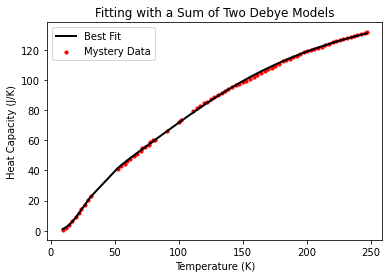

In [56]:
%matplotlib inline

plt.figure()

# Fitting the data and unpacking the fit parameters
pars2D, cov2D = curve_fit(
    Debye_graphing_2, 
    temperatures, heat_capacities, 
    bounds=(0,[np.inf, np.inf, 7, 7, 7])
)
Td_fit2D, Td2_fit2D, atoms_fit2D, a1_fit2D, a2_fit2D = pars2D
        
# Plotting
plt.scatter(temperatures, heat_capacities, s=10, c='r', label='Mystery Data')
plt.plot(temperatures, 
         Debye_graphing_2(temperatures, 
                          Td_fit2D, Td2_fit2D, 
                          atoms_fit2D, 
                          a1_fit2D, a2_fit2D), 
         alpha=1, lw=2, c='k', label='Best Fit')

plt.title('Fitting with a Sum of Two Debye Models')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/K)')
plt.legend() 

# Computing square root of sum of squared residuals and printing result
D2_res = LSRL(heat_capacities, Debye_graphing_2(temperatures, 
                                                Td_fit2D, Td2_fit2D,
                                                atoms_fit2D,
                                                a1_fit2D, a2_fit2D))
print('Sqrt of Sum of Squared Residuals : {:0.3f}'.format(D2_res))
print('Sum of Coefficients in Series = {:0.3f}'.format(atoms_fit2D*(a1_fit2D+a2_fit2D)))



$\quad$ If you ask me this is a pretty exceptional fit curve. Another way to test how well this curve fits the data is to use the alternative heat capacity functions we defined above, which take each model and determine the heat capacity divided by the temperature at that point cubed. We do this below, using the following functions:

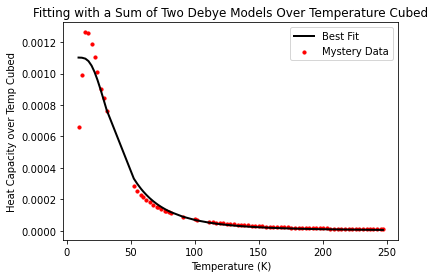

In [57]:
def Debye_2_alt(T, T_d, T_d2, atoms, a1, a2):
    '''
    This is a function which implements the Debye model for 
    heat capacity using a linear combinations of two curves.
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    (float) The heat capacity at the temperature T with units joule per kelvin (J/K)
    '''
    R = 8.3144 # This is the ideal gas constant
    
    # Everything that doesn't involve an integral in C_d above
    A = 9*R*(1/T_d)**3 
    A2 = 9*R*(1/T_d2)**3 
    
    # Everything that does involve an integral in C_d above. 
    # Note that quad returns a tuple: (est. value of integral, upper bound on the error)
    integral = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d/T)[0]
    integral2 = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d2/T)[0]
    
    return a1*atoms*A*integral + a2*atoms*A2*integral2

def Debye_graphing_2_alt(T, T_d, T_d2, atoms, a1, a2):
    '''
    Parameters
    ----------
    T (array) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    An array of heat capacities over the interval of temperatures 
    provided at the characteristic temp T_d
    '''
    return [Debye_2_alt(x, T_d, T_d2, atoms, a1, a2) for x in T]

plt.figure()

# Fitting the data and unpacking the fit parameters
pars2DA, cov2DA = curve_fit(
    Debye_graphing_2_alt, 
    temperatures, mod_heat_capacities, 
    bounds=(0,[np.inf, np.inf, 7, 7, 7])
)
Td_fit2DA, Td2_fit2DA, atoms_fit2DA, a1_fit2DA, a2_fit2DA = pars2DA 
        
# Plotting
plt.scatter(temperatures, mod_heat_capacities, s=10, c='r', label='Mystery Data')
plt.plot(temperatures, 
         Debye_graphing_2_alt(temperatures, 
                              Td_fit2DA, Td2_fit2DA, 
                              atoms_fit2DA, 
                              a1_fit2DA, a2_fit2DA), 
         alpha=1, lw=2, c='k', label='Best Fit')

plt.title('Fitting with a Sum of Two Debye Models Over Temperature Cubed')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity over Temp Cubed')
plt.legend()

$\quad$ The graph above more clearly illustrates the fact that our fit curve doesn't do an excellent job at estimating the heat capacity of this data. Indeed, at lower temperatures (and lower heat capacities) there is a significant discrepancy between the data and the fitting model.

### 5.
$\quad$ Now, we'll try to determine a method which will allow us to find the best linear combination of models to fit this mysterious heat capacity data.

$\quad$ The first thing I tried was fitting the data with the sum of 3 Debye models to see if it afforded a significant increase in the modeling capability from fitting with the sum of only 2 Debye models:

Sqrt of Sum of Squared Residuals : 4.108
Sum of Coefficients in Series = 7.203


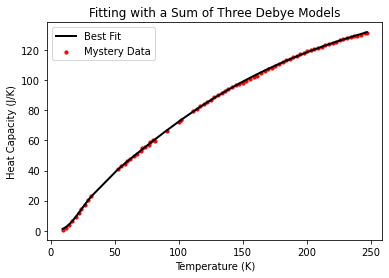

In [58]:
def Debye_3(T, T_d, T_d2, T_d3, atoms, a1, a2, a3):
    '''
    This is a function which implements the Debye model for 
    heat capacity using a linear combinations of two curves.
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    (float) The heat capacity at the temperature T with units joule per kelvin (J/K)
    '''
    R = 8.3144 # This is the ideal gas constant
    
    # Everything that doesn't involve an integral in C_d above
    A = 9*R*(T/T_d)**3 
    A2 = 9*R*(T/T_d2)**3 
    A3 = 9*R*(T/T_d3)**3 
    
    # Everything that does involve an integral in C_d above. 
    # Note that quad returns a tuple: (est. value of integral, upper bound on the error)
    integral = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d/T)[0]
    integral2 = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d2/T)[0]
    integral3 = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d3/T)[0]
    
    return a1*atoms*A*integral + a2*atoms*A2*integral2 + a3*atoms*A3*integral3

def Debye_graphing_3(T, T_d, T_d2, T_d3, atoms, a1, a2, a3):
    '''
    Parameters
    ----------
    T (array) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    An array of heat capacities over the interval of temperatures 
    provided at the characteristic temp T_d
    '''
    return [Debye_3(x, T_d, T_d2, T_d3, atoms, a1, a2, a3) for x in T]

plt.figure()

pars, cov = curve_fit(Debye_graphing_3, temperatures, 
                      heat_capacities, 
                      bounds=(0,[np.inf, np.inf, np.inf, 7, 7, 7, 7])
                     )
Td_fit = pars[0]; Td2_fit = pars[1]; Td3_fit = pars[2] 
atoms_fit = pars[3]; a1_fit = pars[4]; a2_fit = pars[5]; a3_fit = pars[6]

plt.scatter(temperatures, heat_capacities, s=10, c='r', label='Mystery Data')
plt.plot(temperatures, 
         Debye_graphing_3(
             temperatures, 
             Td_fit, Td2_fit, Td3_fit, 
             atoms_fit, a1_fit, a2_fit, a3_fit),
         alpha=1, lw=2, c='k', label='Best Fit')

plt.title('Fitting with a Sum of Three Debye Models')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/K)')
plt.legend() 

# Computing square root of sum of squared residuals and printing result
D3_res = LSRL(heat_capacities, Debye_graphing_3(temperatures, 
                                                Td_fit, Td2_fit, Td3_fit, 
                                                atoms_fit, 
                                                a1_fit, a2_fit, a3_fit))
print('Sqrt of Sum of Squared Residuals : {:0.3f}'.format(D3_res))
print('Sum of Coefficients in Series = {:0.3f}'.format(atoms_fit*(a1_fit+a2_fit+a3_fit)))

$\quad$ Similar to above, we can test this fit using the method of exacerbating the differences in the functions above, namely, by dividing the heat capacity by the temperature cubed.

Sqrt of Sum of Squared Residuals : 0.556925


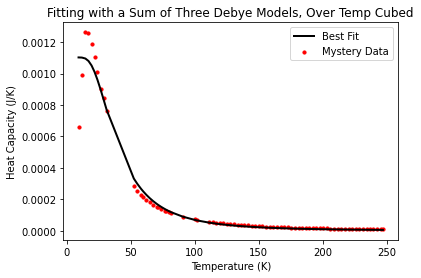

In [59]:
def Debye_3_alt(T, T_d, T_d2, Td_3, atoms, a1, a2, a3):
    '''
    This is a function which implements the Debye model for 
    heat capacity using a linear combinations of two curves.
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    (float) The heat capacity at the temperature T with units joule per kelvin (J/K)
    '''
    R = 8.3144 # This is the ideal gas constant
    
    # Everything that doesn't involve an integral in C_d above
    A = 9*R*(1/T_d)**3 
    A2 = 9*R*(1/T_d2)**3 
    A3 = 9*R*(1/T_d2)**3
    
    # Everything that does involve an integral in C_d above. 
    # Note that quad returns a tuple: (est. value of integral, upper bound on the error)
    integral = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d/T)[0]
    integral2 = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d2/T)[0]
    integral3 = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d2/T)[0]
    
    return a1*atoms*A*integral + a2*atoms*A2*integral2 + a3*atoms*A3*integral3

def Debye_graphing_3_alt(T, T_d, T_d2, T_d3, atoms, a1, a2, a3):
    '''
    Parameters
    ----------
    T (array) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    An array of heat capacities over the interval of temperatures 
    provided at the characteristic temp T_d
    '''
    return [Debye_3_alt(x, T_d, T_d2, T_d3, atoms, a1, a2, a3) for x in T]

plt.figure()

pars, cov = curve_fit(
    Debye_graphing_3_alt, temperatures, 
    mod_heat_capacities, 
    bounds=(0,[np.inf, np.inf, np.inf, 7, 7, 7, 7])
)
Td_fit = pars[0]; Td2_fit = pars[1]; Td3_fit = pars[2] 
atoms_fit = pars[3]; a1_fit = pars[4]; a2_fit = pars[5]; a3_fit = pars[6]

plt.scatter(temperatures, mod_heat_capacities, s=10, c='r', label='Mystery Data')
plt.plot(temperatures, 
         Debye_graphing_3_alt(
             temperatures, 
             Td_fit, Td2_fit, Td3_fit, 
             atoms_fit, a1_fit, a2_fit, a3_fit),
         alpha=1, lw=2, c='k', label='Best Fit')

plt.title('Fitting with a Sum of Three Debye Models, Over Temp Cubed')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/K)')
plt.legend() 

# Computing square root of sum of squared residuals and printing result
D3A_res = LSRL(mod_heat_capacities, Debye_graphing_3_alt(temperatures, 
                                                Td_fit, Td2_fit, Td3_fit,
                                                atoms_fit,
                                                a1_fit, a2_fit, a3_fit))
print('Sqrt of Sum of Squared Residuals : {:f}'.format(D3A_res*1000))

$\quad$ This didn't afford a drastic increase in the modeling capabilities. Based on the graph above, the tendency for this fit to get the heat capacity wrong at low temps is still present.

$\quad$ At this point, I remembered that we had made some functions for modeling the heat capacity with the Einstein model. What would the linear combination of two unique Einstein models look like for this data set? Let's define some new functions and test it:

Sqrt of Sum of Squared Residuals = 8.863
Sum of Coefficients in Series = 6.385


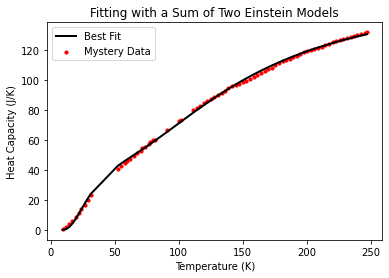

In [60]:
def Einstein_2(T, T_e, T_e2, atoms, a1, a2):
    '''
    This is a function which implements the Debye model for 
    heat capacity using a linear combinations of two curves.
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    (float) The heat capacity at the temperature T with units joule per kelvin (J/K)
    '''
    R = 8.3144 # This is the ideal gas constant
    
    # The left-most term in the product for C_e above
    A1 = 3*R*(T_e/T)**2 
    A2 = 3*R*(T_e2/T)**2 
    
    # The right-most term in the product for C_e above
    B1 = (np.exp(-T_e/T))/(1-np.exp(-T_e/T))**2
    B2 = (np.exp(-T_e2/T))/(1-np.exp(-T_e2/T))**2 
    
    return a1*atoms*A1*B1 + a2*atoms*A2*B2

def Einstein_graphing_2(T, T_e, T_e2, atoms, a1, a2):
    '''
    Parameters
    ----------
    T (array) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    An array of heat capacities over the interval of temperatures 
    provided at the characteristic temp T_d
    '''
    return [Einstein_2(x, T_e, T_e2, atoms, a1, a2) for x in T]

%matplotlib inline

plt.figure()

# Fitting the data and unpacking the fit parameters
pars2E, cov2E = curve_fit(
    Einstein_graphing_2, temperatures, 
    heat_capacities, 
    bounds=(0,[np.inf, np.inf, 7, 7, 7])
)
Te_fit2E, Te2_fit2E, atoms_fit2E, a1_fit2E, a2_fit2E = pars2E
        
# Plotting
plt.scatter(temperatures, heat_capacities, s=10, c='r', label='Mystery Data')
plt.plot(temperatures, 
         Einstein_graphing_2(temperatures, Te_fit2E, Te2_fit2E, atoms_fit2E, a1_fit2E, a2_fit2E), 
         alpha=1, lw=2, c='k', label='Best Fit')

plt.title('Fitting with a Sum of Two Einstein Models')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/K)')
plt.legend() 

# Computing square root of sum of squared residuals and printing result
E2_res = LSRL(heat_capacities, Einstein_graphing_2(temperatures, 
                                                Te_fit2E, Te2_fit2E,
                                                atoms_fit2E,
                                                a1_fit2E, a2_fit2E))
print('Sqrt of Sum of Squared Residuals = {:0.3f}'.format(E2_res))
print('Sum of Coefficients in Series = {:0.3f}'.format(atoms_fit2E*(a1_fit2E+a2_fit2E)))

$\quad$ This is pretty similar to how accurate we got using two Debye models. So, how do these approaches differ when we divide the heat capacity by the respective temperature cubed? These new functions (and graphs) seek to answer that question:

Sqrt of Sum of Squared Residuals : 0.104094


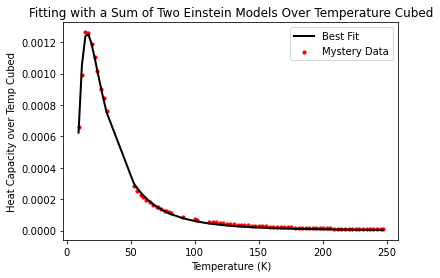

In [61]:
def Einstein_2_alt(T, T_e, T_e2, atoms, a1, a2):
    '''
    This is a function which implements the Debye model for 
    heat capacity using a linear combinations of two curves.
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    (float) The heat capacity at the temperature T with units joule per kelvin (J/K)
    '''
    R = 8.3144 # This is the ideal gas constant
    
    # The left-most term in the product for C_e above
    A1 = 3*R*T_e**2/(T**5) 
    A2 = 3*R*T_e2**2/(T**5)
    
    # The right-most term in the product for C_e above
    B1 = (np.exp(-T_e/T))/(1-np.exp(-T_e/T))**2
    B2 = (np.exp(-T_e2/T))/(1-np.exp(-T_e2/T))**2
    
    return a1*atoms*A1*B1 + a2*atoms*A2*B2

def Einstein_graphing_2_alt(T, T_e, T_e2, atoms, a1, a2):
    '''
    Parameters
    ----------
    T (array) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    An array of heat capacities over the interval of temperatures 
    provided at the characteristic temp T_d
    '''
    return [Einstein_2_alt(x, T_e, T_e2, atoms, a1, a2) for x in T]

plt.figure()

# Fitting the data and unpacking the fit parameters
pars2EA, cov2EA = curve_fit(
    Einstein_graphing_2_alt, temperatures, 
    mod_heat_capacities, 
    bounds=(0,[np.inf, np.inf, 7, 7, 7])
)
Te_fit2EA, Te2_fit2EA, atoms_fit2EA, a1_fit2EA, a2_fit2EA = pars2EA 
        
# Plotting
plt.scatter(temperatures, mod_heat_capacities, s=10, c='r', label='Mystery Data')
plt.plot(temperatures, 
         Einstein_graphing_2_alt(temperatures, 
                                 Te_fit2EA, Te2_fit2EA, 
                                 atoms_fit2EA, 
                                 a1_fit2EA, a2_fit2EA), 
         alpha=1, lw=2, c='k', label='Best Fit')

plt.title('Fitting with a Sum of Two Einstein Models Over Temperature Cubed')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity over Temp Cubed')
plt.legend()

# Computing square root of sum of squared residuals and printing result
E2A_res = LSRL(mod_heat_capacities, Einstein_graphing_2_alt(temperatures, 
                                                Te_fit2EA, Te2_fit2EA,
                                                atoms_fit2EA,
                                                a1_fit2EA, a2_fit2EA))
print('Sqrt of Sum of Squared Residuals : {:f}'.format(E2A_res*1000))

$\quad$ That's pretty good! Although it is clear to see that this model more accurately models the data at lower temperatures, recall from above that using the linear combination of two Einstein models affords a greater value for the square root of the sum of the residuals squared than does the sum of three Deybe models. That is to say, I don't think we can say with certainty that we've found the best way of modeling our data.

$\quad$ In the interest of testing all sorts of types of data fitting, the next model I tried was the sum of a Debye model and an Einstein model:

Sqrt of Sum of Squared Residuals : 7.291
Sum of Coefficients in Series = 6.441


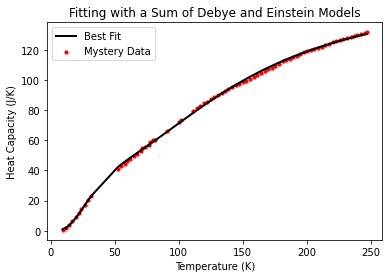

In [62]:
def Model_2(T, T_d, T_e, atoms, a1, a2):
    '''
    This is a function which implements the Debye model for 
    heat capacity using a linear combinations of two curves.
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    (float) The heat capacity at the temperature T with units joule per kelvin (J/K)
    '''
    R = 8.3144 # This is the ideal gas constant
    
    # Everything that doesn't involve an integral in C_d above
    AD = 9*R*(T/T_d)**3 
    AE = 3*R*(T_e/T)**2 
    
    # Everything that does involve an integral in C_d above. 
    # Note that quad returns a tuple: (est. value of integral, upper bound on the error)
    BD = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d/T)[0]
    BE = (np.exp(-T_e/T))/(1-np.exp(-T_e/T))**2
    
    return a1*atoms*AD*BD + a2*atoms*AE*BE

def Model_graph_2(T, T_d, T_e, atoms, a1, a2):
    '''
    Parameters
    ----------
    T (array) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    An array of heat capacities over the interval of temperatures 
    provided at the characteristic temp T_d
    '''
    return [Model_2(x, T_d, T_e, atoms, a1, a2) for x in T]

%matplotlib inline

plt.figure()

# Fitting the data and unpacking the fit parameters
pars2ED, cov2ED = curve_fit(
    Model_graph_2, temperatures, 
    heat_capacities, 
    bounds=(0,[np.inf, np.inf, 7, 7, 7])
)
Td_fit2ED, Td2_fit2ED, atoms_fit2ED, a1_fit2ED, a2_fit2ED = pars2ED
        
# Plotting
plt.scatter(temperatures, heat_capacities, s=10, c='r', label='Mystery Data')
plt.plot(temperatures, 
         Model_graph_2(temperatures, Td_fit2ED, Td2_fit2ED, 
                       atoms_fit2ED, 
                       a1_fit2ED, a2_fit2ED), 
         alpha=1, lw=2, c='k', label='Best Fit')

plt.title('Fitting with a Sum of Debye and Einstein Models')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/K)')
plt.legend() 

# Computing square root of sum of squared residuals and printing result
ED2_res = LSRL(heat_capacities, Model_graph_2(temperatures, 
                                                Td_fit2ED, Td2_fit2ED,
                                                atoms_fit2ED,
                                                a1_fit2ED, a2_fit2ED))
print('Sqrt of Sum of Squared Residuals : {:0.3f}'.format(ED2_res))
print('Sum of Coefficients in Series = {:0.3f}'.format(atoms_fit2ED*(a1_fit2ED+a2_fit2ED)))

Sqrt of Sum of Squared Residuals : 0.084051


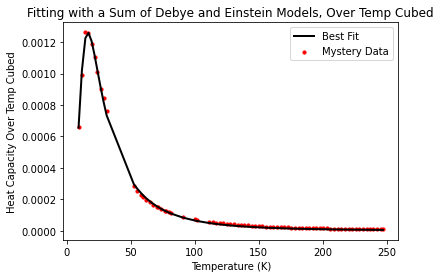

In [63]:
def Mult_2_alt(T, T_d, T_e, atoms, a1, a2):
    '''
    This is a function which implements the Debye model for 
    heat capacity using a linear combinations of two curves.
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    (float) The heat capacity at the temperature T with units joule per kelvin (J/K)
    '''
    R = 8.3144 # This is the ideal gas constant
    
    # Everything that doesn't involve an integral in C_d above
    AD = 9*R*(1/T_d)**3 
    AE = 3*R*T_e**2/(T**5) 
    
    # Everything that does involve an integral in C_d above. 
    # Note that quad returns a tuple: (est. value of integral, upper bound on the error)
    BD = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d/T)[0]
    BE = (np.exp(-T_e/T))/(1-np.exp(-T_e/T))**2
    
    return a1*atoms*AD*BD + a2*atoms*AE*BE
    
def Mult_graph_2_alt(T, T_d, T_e, atoms, a1, a2):
    '''
    Parameters
    ----------
    T (array) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    An array of heat capacities over the interval of temperatures 
    provided at the characteristic temp T_d
    '''
    return [Mult_2_alt(x, T_d, T_e, atoms, a1, a2) for x in T]

plt.figure()

parsM2A, covM2A = curve_fit(
    Mult_graph_2_alt, temperatures, 
    mod_heat_capacities,
    bounds=(0,[np.inf, np.inf, 7, 7, 7])
)
Td_fitM2A, Td2_fitM2A, atoms_fitM2A, a1_fitM2A, a2_fitM2A = parsM2A

plt.scatter(temperatures, mod_heat_capacities, s=10, c='r', label='Mystery Data')
plt.plot(temperatures, 
         Mult_graph_2_alt(
             temperatures, 
             Td_fitM2A, Td2_fitM2A, 
             atoms_fitM2A, a1_fitM2A, a2_fitM2A),
         alpha=1, lw=2, c='k', label='Best Fit')

plt.title('Fitting with a Sum of Debye and Einstein Models, Over Temp Cubed')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity Over Temp Cubed')
plt.legend() 

# Computing square root of sum of squared residuals and printing result
M2A_res = LSRL(mod_heat_capacities, Mult_graph_2_alt(temperatures, 
                                                Td_fitM2A, Td2_fitM2A,
                                                atoms_fitM2A,
                                                a1_fitM2A, a2_fitM2A))
print('Sqrt of Sum of Squared Residuals : {:f}'.format(M2A_res*1000))

$\quad$ This model doesn't do a terrible job either! Not only does it accurately fit the data at low temperetures but also the square root of the sum of the residuals squared decreased from using the sum of two Einstein models.

Sqrt of Sum of Squared Residuals : 4.080399


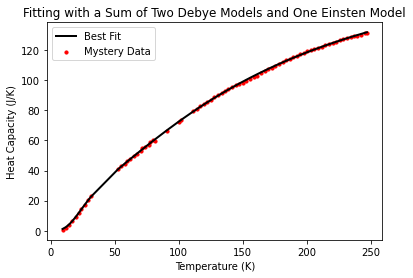

In [64]:
def Model_3E1(T, T_d, T_d2, T_e, atoms, a1, a2, a3):
    '''
    This is a function which implements the Debye model for 
    heat capacity using a linear combinations of two curves.
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    (float) The heat capacity at the temperature T with units joule per kelvin (J/K)
    '''
    R = 8.3144 # This is the ideal gas constant
    
    # Everything that doesn't involve an integral in C_d above
    AD = 9*R*(T/T_d)**3 
    AD2 = 9*R*(T/T_d2)**3 
    AE = 3*R*(T_e/T)**2 
    
    # Everything that does involve an integral in C_d above. 
    # Note that quad returns a tuple: (est. value of integral, upper bound on the error)
    integralD = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d/T)[0]
    integralD2 = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d2/T)[0]
    BE = (np.exp(-T_e/T))/(1-np.exp(-T_e/T))**2
    
    return a1*atoms*AD*integralD + a2*atoms*AD2*integralD2 + a3*atoms*AE*BE

def Model_3E1_graphing(T, T_d, T_d2, T_e, atoms, a1, a2, a3):
    '''
    Parameters
    ----------
    T (array) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    An array of heat capacities over the interval of temperatures provided at the characteristic temp T_d
    '''
    return [Model_3E1(x, T_d, T_d2, T_e, atoms, a1, a2, a3) for x in T]

plt.figure()

pars2D1E, cov2D1E = curve_fit(
    Model_3E1_graphing, temperatures, 
    heat_capacities, 
    bounds=(0,[np.inf, np.inf, np.inf, 7, 7, 7, 7])
)
Td_fit2D1E, Td2_fit2D1E, Td3_fit2D1E, atoms_fit2D1E, a1_fit2D1E, a2_fit2D1E, a3_fit2D1E = pars2D1E

plt.scatter(temperatures, heat_capacities, s=10, c='r', label='Mystery Data')
plt.plot(temperatures, 
         Model_3E1_graphing(
             temperatures, 
             Td_fit2D1E, Td2_fit2D1E, Td3_fit2D1E, 
             atoms_fit2D1E, a1_fit2D1E, a2_fit2D1E, a3_fit2D1E),
         alpha=1, lw=2, c='k', label='Best Fit')

plt.title('Fitting with a Sum of Two Debye Models and One Einsten Model')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/K)')
plt.legend() 

# Computing square root of sum of squared residuals and printing result
D3A_res = LSRL(heat_capacities, Model_3E1_graphing(temperatures, 
                                                Td_fit2D1E, Td2_fit2D1E, Td3_fit2D1E,
                                                atoms_fit2D1E,
                                                a1_fit2D1E, a2_fit2D1E, a3_fit2D1E))
print('Sqrt of Sum of Squared Residuals : {:f}'.format(D3A_res))

$\quad$ Now we'll see how this model stacks up to our alternative plot, testing its estimation ability at lower temperatures and exaggerating those differences.

Sqrt of Sum of Squared Residuals : 0.082896


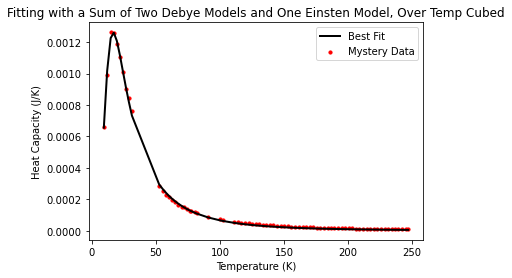

In [65]:
def Model_3E1_alt(T, T_d, T_d2, T_e, atoms, a1, a2, a3):
    '''
    This is a function which implements the Debye model for 
    heat capacity using a linear combinations of two curves.
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    (float) The heat capacity at the temperature T with units joule per kelvin (J/K)
    '''
    R = 8.3144 # This is the ideal gas constant
    
    # Everything that doesn't involve an integral in C_d above
    AD = 9*R*(1/T_d)**3 
    AD2 = 9*R*(1/T_d2)**3 
    AE = 3*R*T_e**2/(T**5)
    
    # Everything that does involve an integral in C_d above. 
    # Note that quad returns a tuple: (est. value of integral, upper bound on the error)
    integralD = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d/T)[0]
    integralD2 = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d2/T)[0]
    BE = (np.exp(-T_e/T))/(1-np.exp(-T_e/T))**2
    
    return a1*atoms*AD*integralD + a2*atoms*AD2*integralD2 + a3*atoms*AE*BE

def Model_graphing_3E1_alt(T, T_d, T_d2, T_e, atoms, a1, a2, a3):
    '''
    Parameters
    ----------
    T (array) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    An array of heat capacities over the interval of temperatures 
    provided at the characteristic temp T_d
    '''
    return [Model_3E1_alt(x, T_d, T_d2, T_e, atoms, a1, a2, a3) for x in T]

plt.figure()

pars2D1EA, cov2D1EA = curve_fit(
    Model_graphing_3E1_alt, temperatures, 
    mod_heat_capacities, 
    bounds=(0,[np.inf, np.inf, np.inf, 7, 7, 7, 7])
)
Td_fit2D1EA, Td2_fit2D1EA, Td3_fit2D1EA, atoms_fit2D1EA, a1_fit2D1EA, a2_fit2D1EA, a3_fit2D1EA = pars2D1EA

plt.scatter(temperatures, mod_heat_capacities, s=10, c='r', label='Mystery Data')
plt.plot(temperatures, 
         Model_graphing_3E1_alt(
             temperatures, 
             Td_fit2D1EA, Td2_fit2D1EA, Td3_fit2D1EA, 
             atoms_fit2D1EA, a1_fit2D1EA, a2_fit2D1EA, a3_fit2D1EA),
         alpha=1, lw=2, c='k', label='Best Fit')

plt.title('Fitting with a Sum of Two Debye Models and One Einsten Model, Over Temp Cubed')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/K)')
plt.legend() 

# Computing square root of sum of squared residuals and printing result
D2E1A_res = LSRL(mod_heat_capacities, Model_graphing_3E1_alt(temperatures, 
                                                Td_fit2D1EA, Td2_fit2D1EA, Td3_fit2D1EA,
                                                atoms_fit2D1EA,
                                                a1_fit2D1EA, a2_fit2D1EA, a3_fit2D1EA))
print('Sqrt of Sum of Squared Residuals : {:f}'.format(D2E1A_res*1000))

$\quad$ In a similar vein, let's try two Einstein models and one Debye model:

Sqrt of Sum of Squared Residuals : 4.080399


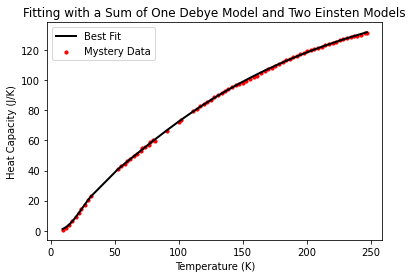

In [66]:
def Model_3D1(T, T_d, T_e, T_e2, atoms, a1, a2, a3):
    '''
    This is a function which implements the Debye model for 
    heat capacity using a linear combinations of two curves.
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    (float) The heat capacity at the temperature T with units joule per kelvin (J/K)
    '''
    R = 8.3144 # This is the ideal gas constant
    
    # Everything that doesn't involve an integral in C_d above
    AD = 9*R*(T/T_d)**3 
    AE = 3*R*(T_e/T)**2 
    AE2 = 3*R*(T_e2/T)**2 
    
    # Everything that does involve an integral in C_d above. 
    # Note that quad returns a tuple: (est. value of integral, upper bound on the error)
    integralD = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d/T)[0]
    BE = (np.exp(-T_e/T))/(1-np.exp(-T_e/T))**2
    BE2 = (np.exp(-T_e2/T))/(1-np.exp(-T_e2/T))**2
    
    return a1*atoms*AD*integralD + a2*atoms*AE*BE + a3*atoms*AE2*BE2

def Model_3D1_graphing(T, T_d, T_e, T_e2, atoms, a1, a2, a3):
    '''
    Parameters
    ----------
    T (array) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    An array of heat capacities over the interval of temperatures 
    provided at the characteristic temp T_d
    '''
    return [Model_3D1(x, T_d, T_e, T_e2, atoms, a1, a2, a3) for x in T]

plt.figure()

pars2E1D, cov2E1D = curve_fit(
    Model_3D1_graphing, temperatures, 
    heat_capacities, 
    bounds=(0,[np.inf, np.inf, np.inf, 7, 7, 7, 7])
)
Td_fit2E1D, Td2_fit2E1D, Td3_fit2E1D, atoms_fit2E1D, a1_fit2E1D, a2_fit2E1D, a3_fit2E1D = pars2E1D

plt.scatter(temperatures, heat_capacities, s=10, c='r', label='Mystery Data')
plt.plot(temperatures, 
         Model_3D1_graphing(
             temperatures, 
             Td_fit2E1D, Td2_fit2E1D, Td3_fit2E1D, 
             atoms_fit2E1D, a1_fit2E1D, a2_fit2E1D, a3_fit2E1D),
         alpha=1, lw=2, c='k', label='Best Fit')

plt.title('Fitting with a Sum of One Debye Model and Two Einsten Models')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/K)')
plt.legend() 

# Computing square root of sum of squared residuals and printing result
E2A_res = LSRL(heat_capacities, Model_3D1_graphing(temperatures, 
                                                Td_fit2E1D, Td2_fit2E1D, Td3_fit2E1D,
                                                atoms_fit2E1D,
                                                a1_fit2E1D, a2_fit2E1D, a3_fit2E1D))
print('Sqrt of Sum of Squared Residuals : {:f}'.format(D3A_res))

Sqrt of Sum of Squared Residuals : 0.109613


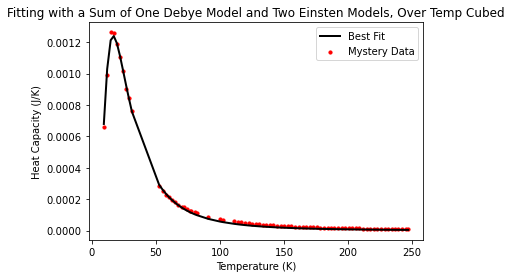

In [67]:
def Model_3D1_alt(T, T_d, T_e, T_e2, atoms, a1, a2, a3):
    '''
    This is a function which implements the Debye model for 
    heat capacity using a linear combinations of two curves.
    Parameters
    ----------
    T (float) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    (float) The heat capacity at the temperature T with units joule per kelvin (J/K)
    '''
    R = 8.3144 # This is the ideal gas constant
    
    # Everything that doesn't involve an integral in C_d above
    AD = 9*R*(1/T_d)**3 
    AE = 3*R*T_e**2/(T**5) 
    AE2 = 3*R*T_e2**2/(T**5)
    
    # Everything that does involve an integral in C_d above. 
    # Note that quad returns a tuple: (est. value of integral, upper bound on the error)
    integralD = quad(lambda x: (x**4)*np.exp(-x)/(1-np.exp(-x))**2, 0, T_d/T)[0]
    BE = (np.exp(-T_e/T))/(1-np.exp(-T_e/T))**2
    BE2 = (np.exp(-T_e2/T))/(1-np.exp(-T_e2/T))**2
    
    return a1*atoms*AD*integralD + a2*atoms*AE*BE + a3*atoms*AE2*BE2

def Model_graphing_3D1_alt(T, T_d, T_e, T_e2, atoms, a1, a2, a3):
    '''
    Parameters
    ----------
    T (array) = temperature to evaluate the function at
    T_X (float) = Characteristic temperatures
    atoms (float) = number of atoms  per formula unit
    aX (float) = coefficients
    
    Returns
    -------
    An array of heat capacities over the interval of temperatures 
    provided at the characteristic temp T_d
    '''
    return [Model_3D1_alt(x, T_d, T_e, T_e2, atoms, a1, a2, a3) for x in T]

plt.figure()

pars2E1DA, cov2E1DA = curve_fit(
    Model_graphing_3D1_alt, temperatures, 
    mod_heat_capacities, 
    bounds=(0,[np.inf, np.inf, np.inf, 7, 7, 7, 7])
)
Td_fit2E1DA, Td2_fit2E1DA, Td3_fit2E1DA, atoms_fit2E1DA, a1_fit2E1DA, a2_fit2E1DA, a3_fit2E1DA = pars2E1DA

plt.scatter(temperatures, mod_heat_capacities, s=10, c='r', label='Mystery Data')
plt.plot(temperatures, 
         Model_graphing_3D1_alt(
             temperatures, 
             Td_fit2E1DA, Td2_fit2E1DA, Td3_fit2E1DA, 
             atoms_fit2E1DA, a1_fit2E1DA, a2_fit2E1DA, a3_fit2E1DA),
         alpha=1, lw=2, c='k', label='Best Fit')

plt.title('Fitting with a Sum of One Debye Model and Two Einsten Models, Over Temp Cubed')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/K)')
plt.legend() 

# Computing square root of sum of squared residuals and printing result
E2D1A_res = LSRL(mod_heat_capacities, Model_graphing_3D1_alt(temperatures, 
                                                Td_fit2E1DA, Td2_fit2E1DA, Td3_fit2E1DA,
                                                atoms_fit2E1DA,
                                                a1_fit2E1DA, a2_fit2E1DA, a3_fit2E1DA))
print('Sqrt of Sum of Squared Residuals : {:f}'.format(E2D1A_res*1000))

$\quad$ Based on all of these models, it is in my humble scientific opinion that using the model of the sum of two Debye models and one Einstein model affords good enough accuracy while not overmodeling at the cost of computing power. Not only does this model accurately describe the data for small and large temperatures, but also it does so while minimizing the error between the estimate and observed data.

$\quad$ If I were the researcher performing this experiment, the accuracy of this model would be sufficient enough for modeling the data. Thus, the following model (and associated parameters) will accurately describe this data model.

Normal Graph
########################################
Sqrt of Sum of Squared Residuals = 4.080
Sum of Coefficients (alphas) = 7.125


Alternate Graph
########################################
Sqrt of Sum of Squared Residuals = 0.110
Sum of Coefficients (alphas) = 2.624




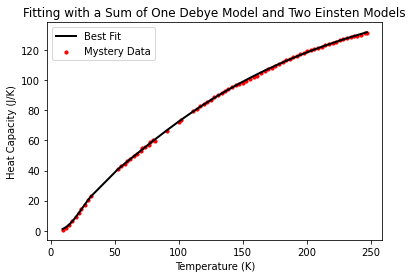

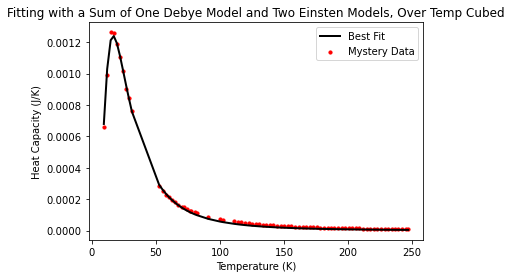

In [68]:
%matplotlib inline
plt.figure()

pars2E1D, cov2E1D = curve_fit(
    Model_3D1_graphing, temperatures, 
    heat_capacities, 
    bounds=(0,[np.inf, np.inf, np.inf, 7, 7, 7, 7])
)
Td_fit2E1D, Td2_fit2E1D, Td3_fit2E1D, atoms_fit2E1D, a1_fit2E1D, a2_fit2E1D, a3_fit2E1D = pars2E1D

plt.scatter(temperatures, heat_capacities, s=10, c='r', label='Mystery Data')
plt.plot(temperatures, 
         Model_3D1_graphing(
             temperatures, 
             Td_fit2E1D, Td2_fit2E1D, Td3_fit2E1D, 
             atoms_fit2E1D, a1_fit2E1D, a2_fit2E1D, a3_fit2E1D),
         alpha=1, lw=2, c='k', label='Best Fit')

plt.title('Fitting with a Sum of One Debye Model and Two Einsten Models')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/K)')
plt.legend() 

# Computing square root of sum of squared residuals and printing result
E2A_res = LSRL(heat_capacities, Model_3D1_graphing(temperatures, 
                                                Td_fit2E1D, Td2_fit2E1D, Td3_fit2E1D,
                                                atoms_fit2E1D,
                                                a1_fit2E1D, a2_fit2E1D, a3_fit2E1D))
print('Normal Graph')
print('########################################')
print('Sqrt of Sum of Squared Residuals = {:0.3f}'.format(D3A_res))
print('Sum of Coefficients (alphas) = {0:0.3f}'.format(
    atoms_fit2E1D*(a1_fit2E1D+a2_fit2E1D+a3_fit2E1D))
     )
print('\n')

plt.figure()

pars2E1DA, cov2E1DA = curve_fit(
    Model_graphing_3D1_alt, temperatures, 
    mod_heat_capacities, 
    bounds=(0,[np.inf, np.inf, np.inf, 7, 7, 7, 7])
)
Td_fit2E1DA, Td2_fit2E1DA, Td3_fit2E1DA, atoms_fit2E1DA, a1_fit2E1DA, a2_fit2E1DA, a3_fit2E1DA = pars2E1DA

plt.scatter(temperatures, mod_heat_capacities, s=10, c='r', label='Mystery Data')
plt.plot(temperatures, 
         Model_graphing_3D1_alt(
             temperatures, 
             Td_fit2E1DA, Td2_fit2E1DA, Td3_fit2E1DA, 
             atoms_fit2E1DA, a1_fit2E1DA, a2_fit2E1DA, a3_fit2E1DA),
         alpha=1, lw=2, c='k', label='Best Fit')

plt.title('Fitting with a Sum of One Debye Model and Two Einsten Models, Over Temp Cubed')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/K)')
plt.legend() 

# Computing square root of sum of squared residuals and printing result
E2D1A_res = LSRL(mod_heat_capacities, Model_graphing_3D1_alt(temperatures, 
                                                Td_fit2E1DA, Td2_fit2E1DA, Td3_fit2E1DA,
                                                atoms_fit2E1DA,
                                                a1_fit2E1DA, a2_fit2E1DA, a3_fit2E1DA))
print('Alternate Graph')
print('########################################')
print('Sqrt of Sum of Squared Residuals = {:0.3f}'.format(E2D1A_res*1000))
print('Sum of Coefficients (alphas) = {0:0.3f}'.format(
    atoms_fit2E1DA*(a1_fit2E1DA+a2_fit2E1DA+a3_fit2E1DA))
     )
print('\n')

$\quad$ Clearly, this is not an exhaustive analysis of the data to ensure that I found the absolute best function to fit the data. For the life of my I couldn't figure out how to optimize a linear combination of an arbitrary set of functions all with different parameters. However, I do think I found a model that suits the data well enough for reserach purposes.